In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("cold_case_analyzer/data/case_analysis_results.csv")
df2 = pd.read_csv("cold_case_analyzer/data/case_analysis_results_2.csv")
df3 = pd.read_csv("cold_case_analyzer/data/case_analysis_results_3.csv")
df4 = pd.read_csv("cold_case_analyzer/data/case_analysis_results_4.csv")

In [5]:
i=2
print(df.columns[i])
print(df.iloc[0].iloc[0])
print("\n")
print("round 1")
print(df.iloc[0].iloc[i])
print("\n")
print("round 2")
print(df2.iloc[0].iloc[i])
print("\n")
print("round 3")
print(df3.iloc[0].iloc[i])
print("\n")
print("round 4")
print(df4.iloc[0].iloc[i])

Relevant Facts
CHE-1045


round 1
**Summary of the Case:**

In November 2006, X.________ was employed by Y.________ SA, a company based in the canton of Vaud, Switzerland, to help establish the company in Italy. On April 25, 2007, X.________ was verbally informed of her dismissal by B.________ and A.________, representatives of Y.________, during a meeting at the company's Geneva office. This dismissal was later confirmed in a letter dated April 25, 2007, signed by C.________, the director of Y.________, and received by X.________ via email on May 1, 2007. 

On the morning of April 25, before the dismissal meeting, X.________ had consulted a doctor who found her to be suffering from an infection and wanted to prescribe sick leave, which she refused due to work commitments. She subsequently produced medical certificates retroactively establishing her incapacity to work from April 25 to May 13 due to illness.

X.________ challenged the validity of her dismissal, claiming it was ineffecti

In [31]:
# BERTScore
from bert_score import BERTScorer
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

predictions = []
predictions.insert(0, df4.iloc[0].iloc[1])
predictions.insert(1, df4.iloc[1].iloc[1])
references = [
    "Employment contract; termination, appeal against the decision of the Court of Appeal of the Labour Court of the Canton of Geneva of March 26, 2009.",
    "Art. 154 et seq. PILA. Law applicable to the personal statute of a company. 1. review of party capacity in appeal proceedings (E. 2). 2. according to Art. 154 para. 1 PILA, the law of the state in which a company is incorporated is to be used to determine its personal status (E. 4). Under the rule of the PILA, there is no room for the reservation of the fictitious domicile chosen for the purpose of circumventing the law (E. 5 and 6). On the other hand, the reservation clause of Swiss public policy (Art. 17 PILA) constitutes a general barrier for the incorporation theory (E. 7). 3. capacity to act of the plaintiff, a company domiciled in Panama, affirmed in the present case (E. 8)."
]

P, R, F1 = scorer.score(predictions, references)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
F1

tensor([0.2631, 0.1536])

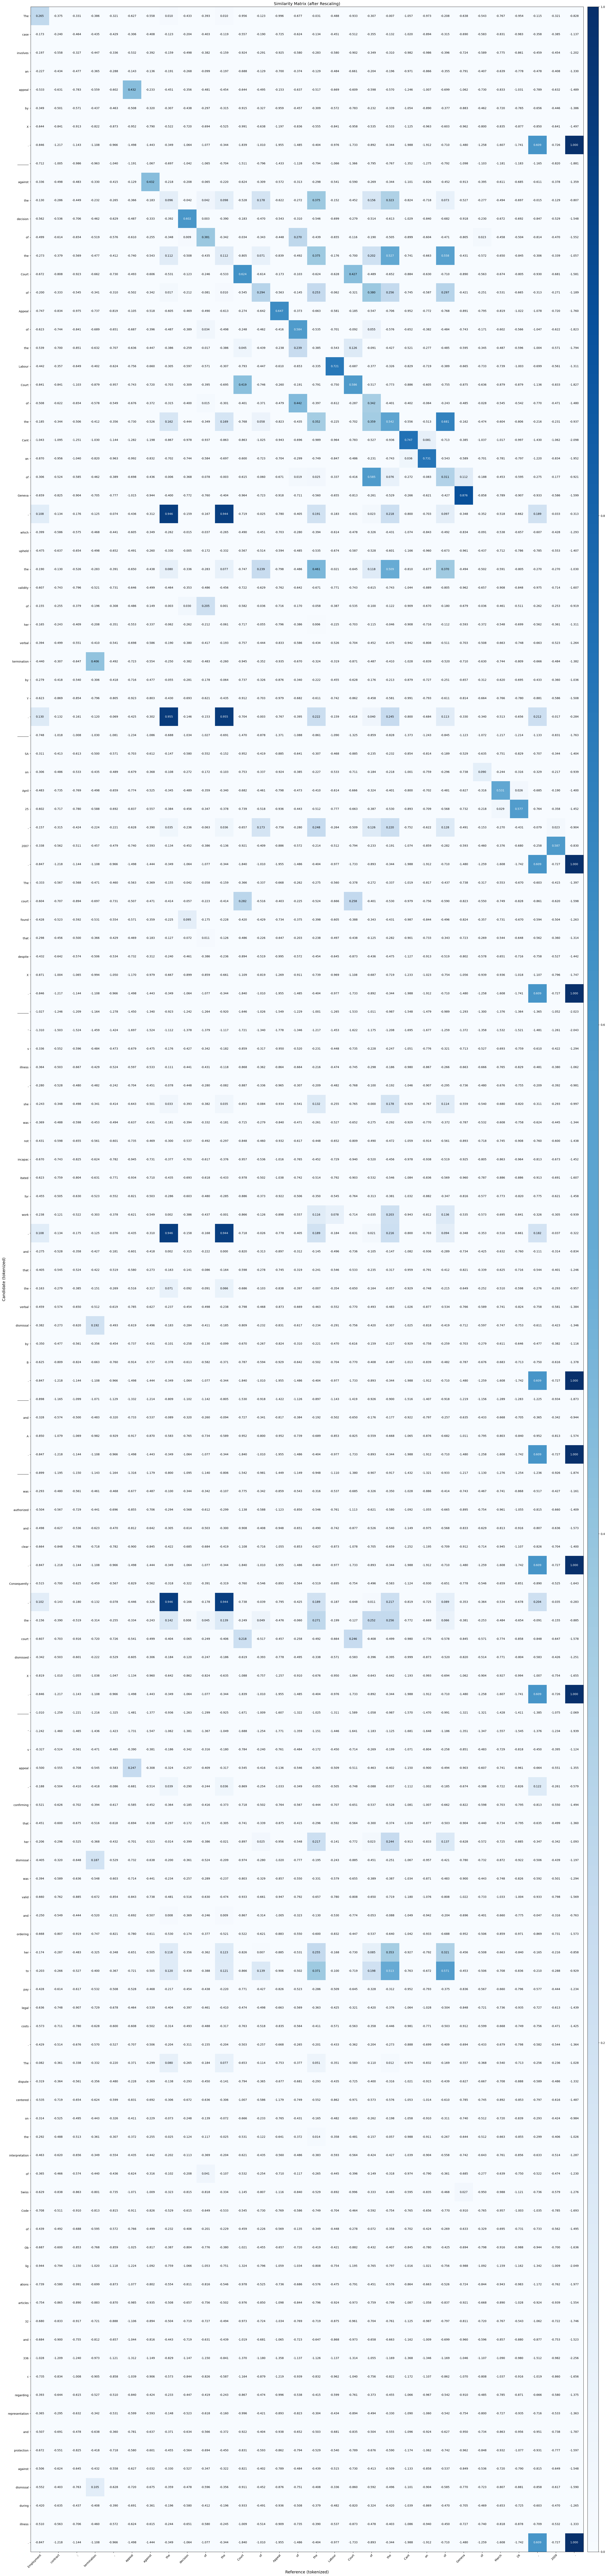

In [34]:
scorer.plot_example(predictions[0], references[0])